In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('a1_RestaurantReviews_HistoricDump.tsv', sep='\t', header=0)

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.shape

(900, 2)

# Data preprocessing

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [6]:
nltk.download('stopwords')
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aigerimsagadiyeva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
corpus = []

for i in range(0, 900):
    review = re.sub('[^a-zA-z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

# Bag of Words Representation

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [10]:
data.iloc[:,-1]

0      1
1      0
2      0
3      1
4      1
      ..
895    1
896    1
897    1
898    0
899    1
Name: Liked, Length: 900, dtype: int64

In [11]:
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:,-1].values

# Dividing data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model training - Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# Model Performance

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
print(confusion_matrix(y_pred, y_test))

[[67 38]
 [11 64]]


In [19]:
print(accuracy_score(y_pred, y_test))

0.7277777777777777


# Sentiment Prediction

In [20]:
data_fresh = pd.read_csv('a2_RestaurantReviews_FreshDump.tsv', sep='\t', header=0)

In [21]:
data_fresh.head()

,Review
0,Spend your money elsewhere.
1,Their regular toasted bread was equally satisf...
2,The Buffet at Bellagio was far from what I ant...
3,"And the drinks are WEAK, people!"
4,-My order was not correct.


In [22]:
data_fresh.shape

(100, 1)

In [23]:
corpus_new = []

for i in range(0, 100):
    review = re.sub('[^a-zA-z]', ' ', data_fresh['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus_new.append(review)

In [24]:
corpus_new

['spend money elsewher',
 'regular toast bread equal satisfi occasion pat butter mmmm',
 'buffet bellagio far anticip',
 'drink weak peopl',
 'order not correct',
 'also feel like chip bought not made hous',
 'disappoint dinner went elsewher dessert',
 'chip sal amaz',
 'return',
 'new fav vega buffet spot',
 'serious cannot believ owner mani unexperienc employe run around like chicken head cut',
 'sad',
 'felt insult disrespect could talk judg anoth human like',
 'call steakhous properli cook steak understand',
 'not impress concept food',
 'thing crazi guacamol like pur ed',
 'realli noth postino hope experi better',
 'got food poison buffet',
 'brought fresh batch fri think yay someth warm',
 'hilari yummi christma eve dinner rememb biggest fail entir trip us',
 'needless say go back anytim soon',
 'place disgust',
 'everi time eat see care teamwork profession degre',
 'ri style calamari joke',
 'howev much garlic fondu bare edibl',
 'could bare stomach meal complain busi lunch',
 '

In [25]:
X_fresh = cv.transform(corpus_new).toarray()

In [26]:
X_fresh.shape

(100, 1420)

In [27]:
y_pred_new = classifier.predict(X_fresh)

In [28]:
print(y_pred_new)

[0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [29]:
data_fresh['predicted_label'] = y_pred_new.tolist()
data_fresh.head()

,Review,predicted_label
0,Spend your money elsewhere.,0
1,Their regular toasted bread was equally satisf...,1
2,The Buffet at Bellagio was far from what I ant...,1
3,"And the drinks are WEAK, people!",0
4,-My order was not correct.,0


In [30]:
data_fresh.to_csv("c3_Predicted_Sentiments_Fresh_Dump.tsv", sep='\t', encoding='UTF-8', index=False)

In [38]:
reviews_count = data_fresh.value_counts(data_fresh['predicted_label']==1).tolist()
labels = ['Negative', 'Positive']

Text(0.5, 1.0, 'Reviews Ratio')

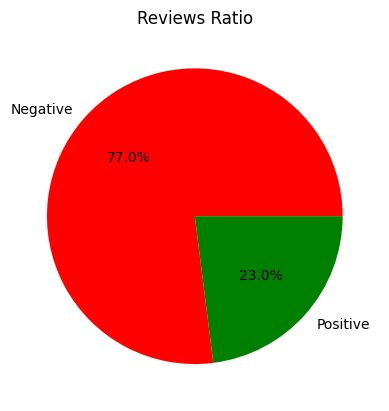

In [44]:
mycolors = ["red", "green"]
plt.pie(reviews_count, labels=labels, autopct='%1.1f%%', colors=mycolors)
plt.title('Reviews Ratio')